# Face landmark detection guide

The MediaPipe Face Landmarker task lets you detect face landmarks and facial expressions in images and videos. You can use this task to identify human facial expressions, apply facial filters and effects, and create virtual avatars. This task uses machine learning (ML) models that can work with single images or a continuous stream of images. The task outputs 3-dimensional face landmarks, blendshape scores (coefficients representing facial expression) to infer detailed facial surfaces in real-time, and transformation matrices to perform the transformations required for effects rendering.

## Task details

This section describes the capabilities, inputs, outputs, and configuration options of this task.

### Features
* Input image processing - Processing includes image rotation, resizing, normalization, and color space conversion.
* Score threshold - Filter results based on prediction scores.

| Task inputs | Task outputs |
| :--- | :--- |
| The Face Landmarker accepts an input of one of the following data types:<br>- Still images<br>- Decoded video frames<br>- Live video feed | The Face Landmarker outputs the following results:<br>- A complete face mesh for each detected face, with blendshape scores denoting facial expressions and coordinates for facial landmarks.<br>- Face Blendshape and Facial transformation matrixes |

### Configurations options

This task has the following configuration options:

| Option Name | Description | Value Range | Default Value |
| :--- | :--- | :--- | :--- |
| `running_mode` | Sets the running mode for the task. There are three modes:<br><br>IMAGE: The mode for single image inputs.<br><br>VIDEO: The mode for decoded frames of a video.<br><br>LIVE_STREAM: The mode for a livestream of input data, such as from a camera. In this mode, resultListener must be called to set up a listener to receive results asynchronously. | `{IMAGE, VIDEO, LIVE_STREAM}` | `IMAGE` |
| `num_faces` | The maximum number of faces that can be detected by the the **FaceLandmarker**. Smoothing is only applied when **num_faces** is set to 1. | `Integer > 0` | `1` |
| `min_face_detection_confidence` | The minimum confidence score for the face detection to be considered successful. | `Float [0.0,1.0]` | `0.5` |
| `min_face_presence_confidence` | The minimum confidence score of face presence score in the face landmark detection. | `Float [0.0,1.0]` | `0.5` |
| `min_tracking_confidence` | The minimum confidence score for the face tracking to be considered successful. | `Float [0.0,1.0]` | `0.5` |
| `output_face_blendshapes` | Whether Face Landmarker outputs face blendshapes. Face blendshapes are used for rendering the 3D face model. | `Boolean` | `False` |
| `output_facial_transformation_matrixes` | Whether FaceLandmarker outputs the facial transformation matrix. FaceLandmarker uses the matrix to transform the face landmarks from a canonical face model to the detected face, so users can apply effects on the detected landmarks. | `Boolean` | `False` |
| `result_callback` | 	Sets the result listener to receive the landmarker results asynchronously when FaceLandmarker is in the live stream mode. Can only be used when running mode is set to **LIVE_STREAM** | `ResultListener` | `N/A` |

## Models

The Face Landmarker uses a series of models to predict face landmarks. The first model detects faces, a second model locates landmarks on the detected faces, and a third model uses those landmarks to identify facial features and expressions.

The following models are packaged together into a downloadable model bundle:
* Face detection model: detects the presence of faces with a few key facial landmarks.
* Face mesh model: adds a complete mapping of the face. The model outputs an estimate of 478 3-dimensional face landmarks.
* Blendshape prediction model: receives output from the face mesh model predicts 52 blendshape scores, which are coefficients representing facial different expressions.

The face detection model is the [BlazeFace short-range](https://developers.google.com/mediapipe/solutions/vision/face_detector#blazeface_short-range) model, a lightweight and accurate face detector optimized for mobile GPU inference. For more information, see the [Face Detector](https://ai.google.dev/edge/mediapipe/solutions/vision/face_detector/index) task.

The image below shows a complete mapping of facial landmarks from the model bundle output.

![Example](https://ai.google.dev/static/mediapipe/images/solutions/face_landmarker_keypoints.png)

| Model bundle | Input shape | Data type | Model Cards | Versions |
| :--- |:--- |:--- |:--- |:--- |
| [FaceLandMarker](https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/latest/face_landmarker.task) | FaceDetector: 192 x 192<br>FaceMesh-V2: 256 x 256<br>Blendshape: 1 x 146 x 2 | float 16 | [FaceDetector](https://storage.googleapis.com/mediapipe-assets/MediaPipe%20BlazeFace%20Model%20Card%20(Short%20Range).pdf)<br>[FaceMesh-V2](https://storage.googleapis.com/mediapipe-assets/Model%20Card%20MediaPipe%20Face%20Mesh%20V2.pdf)<br>[Blendshape](https://storage.googleapis.com/mediapipe-assets/Model%20Card%20Blendshape%20V2.pdf) | [Latest](https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/latest/face_landmarker.task) |

## Preparation

Let's start with installing MediaPipe.

In [ ]:
# pip install -q mediapipe

Then download the off-the-shelf model bundle(s). Check out the MediaPipe documentation for more information about these model bundles.

In [ ]:
# !curl -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

## Visualization utilities

In [4]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe.tasks.python.vision import drawing_utils
from mediapipe.tasks.python.vision import drawing_styles
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.


    drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=vision.FaceLandmarksConnections.FACE_LANDMARKS_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=drawing_styles.get_default_face_mesh_tesselation_style())
    drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=vision.FaceLandmarksConnections.FACE_LANDMARKS_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=drawing_styles.get_default_face_mesh_contours_style())
    drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=vision.FaceLandmarksConnections.FACE_LANDMARKS_LEFT_IRIS,
          landmark_drawing_spec=None,
          connection_drawing_spec=drawing_styles.get_default_face_mesh_iris_connections_style())
    drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=vision.FaceLandmarksConnections.FACE_LANDMARKS_RIGHT_IRIS,
          landmark_drawing_spec=None,
          connection_drawing_spec=drawing_styles.get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

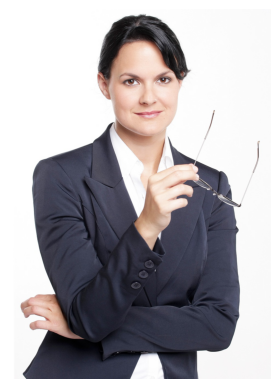

In [11]:
# !curl -q -O image.png https://storage.googleapis.com/mediapipe-assets/business-person.png

import cv2
import matplotlib.pyplot as plt

# Resmi oku
img = cv2.imread('image.png')
# OpenCV resimleri BGR formatında okur, Matplotlib ise RGB bekler.
# Renklerin doğru görünmesi için dönüştürme yapmalıyız:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Satır içi gösterim
plt.imshow(img_rgb)
plt.axis('off') # Eksenleri gizler
plt.show()

## Running inference and visualizing the results

Here are the steps to run face landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker/python) to learn more about configuration options that this task supports.


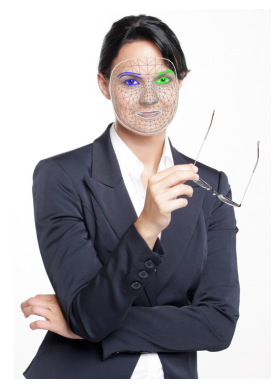

In [13]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.png")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result.
image_copy = np.copy(image.numpy_view())
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
# MediaPipe zaten RGB döndürdüğü için cv2.cvtColor yapmanıza gerek yok.
# Direkt görselleştirebiliriz:
plt.imshow(annotated_image)
plt.axis('off') # Koordinat eksenlerini gizler
plt.show()

We will also visualize the face blendshapes categories using a bar graph.

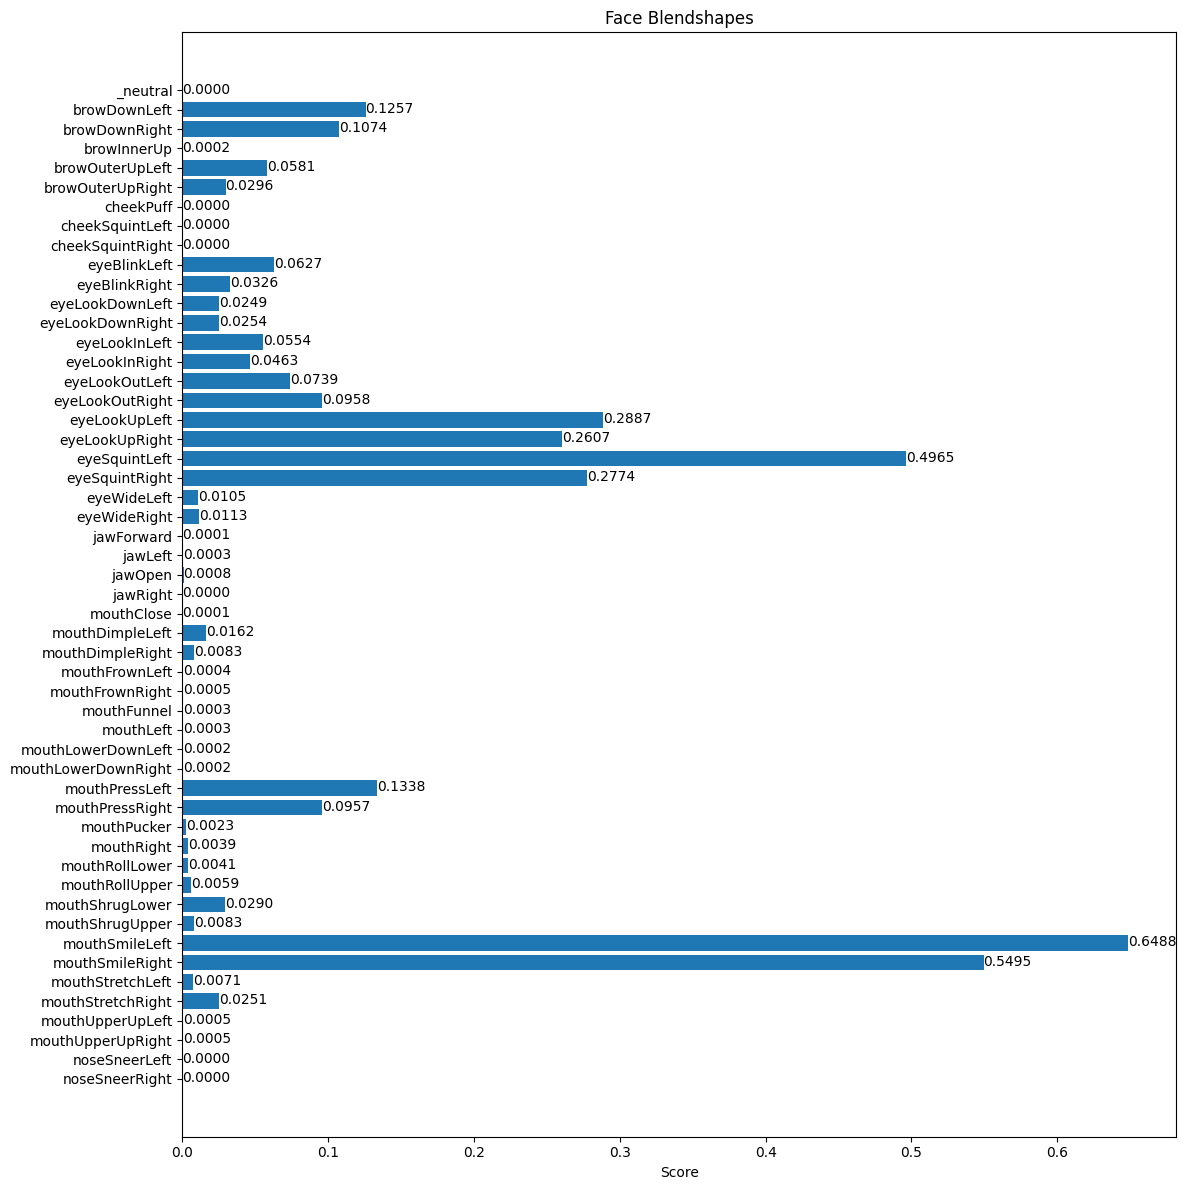

In [14]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

And print the transformation matrix.

In [15]:
print(detection_result.facial_transformation_matrixes)

[array([[ 9.92211282e-01, -6.04938194e-02,  1.08890325e-01,
         1.18761206e+00],
       [ 9.10417959e-02,  9.48800623e-01, -3.02470714e-01,
         2.23726883e+01],
       [-8.50176066e-02,  3.10028434e-01,  9.46918249e-01,
        -6.80151749e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]], dtype=float32)]
